In [3]:
import networkx as nx
import random
import pandas as pd


df = pd.read_csv('data/batch_task.csv', header=None)
G = nx.DiGraph()

node_to_id = {}

seen = set()

id_val = 0

for i, entry in enumerate(df[0]):
    if entry != "MergeTask" and (entry[0] == "M" or entry[0] == "R") and entry not in seen:
        
        
        seen.add(entry)
        lst = entry[1:].split("_")
        
        child = int(lst[0])
        
        if child not in node_to_id:
            
            node_to_id[child] = id_val
            G.add_node(id_val)
            id_val += 1
        
#         print(lst)
    
        for i in range(1, len(lst)):
            try:
                
#                 print(node_to_id)
                parent = int(lst[i])

                if parent not in node_to_id:
                    node_to_id[parent] = id_val
                    G.add_node(id_val)
                    id_val += 1
                
                if not G.has_edge(node_to_id[parent], node_to_id[child]):
                    id1 = node_to_id[parent]
                    id2 = node_to_id[child]
                    G.add_edge(id1, id2)

                if not nx.is_directed_acyclic_graph(G):
                    id1 = node_to_id[parent]
                    id2 = node_to_id[child]
                    G.remove_edge(id1, id2)        
            except ValueError:
                continue
            
            
G.nodes
        
   

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202))

In [16]:
# create dictionary of graphs of various sizes using dfs
from collections import defaultdict
graph_dic = defaultdict(list)


avaliable = []
for node in G:
    if G.in_degree(node) == 0:
        avaliable.append(node)
        



while avaliable:
    node = avaliable.pop()
    children = nx.descendants(G, node)
    print([node] + list(children))
    sg = G.subgraph([node] + list(children)).copy()
    graph_dic[len(sg)].append(sg)


# for s in sg:
#     graph_dic[len(s)].append(s)

    
    
    
    
#     node = avaliable.pop()
#     if node not in explored:
        
        
#         sub_G = nx.DiGraph()
        
#         node_id = 0
#         node_id_to_name = {}
#         node_name_to_id = {}
#         node_id_to_name[node_id] = node
#         node_name_to_id[node] = node_id
        
#         stack = [(node_id, None)]
#         node_id += 1
        
        
#         while stack:
            
# #             if node == 135:
# #                 print(stack)
#             curr_node, parent_node = stack.pop()
#             sub_G.add_node(curr_node)
#             if parent_node:
#                 assert(parent_node in sub_G)
#                 assert(curr_node in sub_G)
#                 sub_G.add_edge(parent_node, curr_node) 
#             explored.add(node_id_to_name[curr_node])
#             for d in G.successors(node_id_to_name[curr_node]):
#                 if d not in explored:   
#                     node_id_to_name[node_id] = d
#                     node_name_to_id[d] = node_id
#                     stack.append((node_id, curr_node))
#                     node_id += 1
#                 else:
#                     sub_G.add_edge(curr_node, curr_node) 
                    
           
#         if node == 135:
#             print(node_id_to_name)
            
#         print(sub_G.nodes)
                    
#         num_tasks = len(sub_G)
# #         print(num_tasks, sub_G)
#         graph_dic[num_tasks].append(sub_G.copy())
        
    

# print(graph_dic)


[201, 200]
[199, 202]
[192, 130, 172, 197]
[187, 194]
[184, 183]
[180, 179]
[175, 196]
[169, 168]
[167, 166]
[161, 160]
[159, 158]
[156, 188]
[154, 189]
[153, 152]
[151, 181]
[150, 165]
[147, 155]
[144, 143]
[142, 178]
[141, 140]
[139, 138]
[137, 171]
[136, 174]
[135, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 130, 131, 132, 133, 134, 145, 146, 148, 149, 157, 162, 163, 164, 170, 172, 173, 176, 177, 182, 185, 186, 190, 191, 193, 195, 196, 197, 198]
[129, 128]


In [17]:
print(graph_dic)

defaultdict(<class 'list'>, {2: [<networkx.classes.digraph.DiGraph object at 0x1a39df9490>, <networkx.classes.digraph.DiGraph object at 0x1a39df9090>, <networkx.classes.digraph.DiGraph object at 0x1a39df9510>, <networkx.classes.digraph.DiGraph object at 0x1a39df9390>, <networkx.classes.digraph.DiGraph object at 0x1a39df9790>, <networkx.classes.digraph.DiGraph object at 0x1a39df9750>, <networkx.classes.digraph.DiGraph object at 0x1a39df9a50>, <networkx.classes.digraph.DiGraph object at 0x1a39df9c50>, <networkx.classes.digraph.DiGraph object at 0x1a39df9dd0>, <networkx.classes.digraph.DiGraph object at 0x1a39df9f50>, <networkx.classes.digraph.DiGraph object at 0x1a39e1b0d0>, <networkx.classes.digraph.DiGraph object at 0x1a39e1b250>, <networkx.classes.digraph.DiGraph object at 0x1a39e1b3d0>, <networkx.classes.digraph.DiGraph object at 0x1a39e1b550>, <networkx.classes.digraph.DiGraph object at 0x1a39e1b6d0>, <networkx.classes.digraph.DiGraph object at 0x1a39e1b850>, <networkx.classes.digra

[135]
157


True

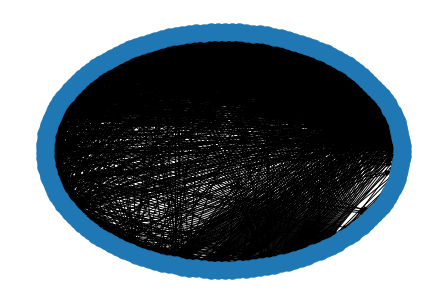

In [19]:
sG = graph_dic[157][0]

avaliable = []
for node in sG:
    if sG.in_degree(node) == 0:
        avaliable.append(node)
print(avaliable)
print(len(sG))
pos=nx.circular_layout(sG)
nx.draw(sG, pos, nodecolor='y',edge_color='k')
nx.is_directed_acyclic_graph(sG)

In [ ]:
# Objective is to minimize MRT + E
mrt = True
tie_breaking_rule = 2
plot = False

max_counter = 10
num_machine_lst = [1, 2]

opt_obj_lst = []
obj_lb_precise_lst = []
obj_ub_precise_lst = []
obj_lb_lst = []

num_tasks = 203

for num_machines in num_machine_lst:
    
    min_lb = float('inf')
    min_lb_precise = float('inf')
    max_ub = -float('inf')
    max_ub_precise = - float('inf')
    
    opt_obj = []
    
    min_ratio = np.infty
    max_ratio = -np.infty
    saved_max_seed = None
    saved_min_seed = None
    max_overall_ratio = - np.infty
    counter = 0
    
#     print("On " + str(num_tasks))
    
#     while counter != max_counter:
        
#         print("Test " + str(counter) )
#         # Random
         
#         seed=random.randint(0, 100000)
    
#     G = random_dag(num_tasks, edges, seed=seed)

    w = [1 for _ in range(num_tasks)]
    s = [1 for _ in range(num_tasks)]

    # Get ordering using modified ETF
    test = Mod_ETF(G, w, s, num_machines, tie_breaking_rule, plot=plot)

    # Initialize objective function value
    heuristic_opt = test.obj_value

    # Get pseudosize, convert to speed
    psize, group_interval = approx_psize_homogeneous(G, test.order, test.h, test.t, verbose=False)
    s_prime = psize_to_speed(psize)

    # Get ordering using modified ETF
    test2 = Mod_ETF(G, w, s_prime, num_machines, tie_breaking_rule, plot=plot)

    # Check if the objective function value has improved
    if heuristic_opt > test2.obj_value:
        heuristic_opt = test2.obj_value
        s = s_prime

    # Given ordering, find optimal speeds
    temp = get_objective_single_ordering(mrt, G, w, test.order, plot=plot, compare=False)
    opt_intervals, s_opt, obj_opt, _ = temp 
    if s_opt[0] != -1:
        counter += 1

        if (heuristic_opt / obj_opt) > max_overall_ratio:
            max_overall_ratio = heuristic_opt / obj_opt

        s_ratios = [s[i] / s_opt[i] for i in range(len(s))]

#         if max(s_ratios) > max_ratio:
#             max_ratio = max(s_ratios)
#             saved_max_seed = seed

#         if min(s_ratios) < min_ratio:
#             min_ratio = min(s_ratios)
#             saved_min_seed = seed

        obj_lb = 2 * sum(psize_to_speed(lb_lst(G, num_machines, test.order)))
        obj_lb_lst.append([num_machines, obj_lb])

        obj_lb_precise = 2 * sum(psize_to_speed(lb_lst_precise(G, num_machines, test.order, num_concurrent_running_tasks(num_tasks, group_interval))))
        obj_lb_precise_lst.append([num_machines, obj_lb_precise])

        obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, test.order)))
        obj_ub_precise_lst.append([num_machines, obj_ub_precise])

        opt_obj_lst.append([num_machines, obj_opt])

        #assert(obj_lb <= obj_opt <= obj_ub_precise)
        print(obj_lb, obj_opt, obj_ub_precise)

    else:

        print("SKIP THIS ONE")





print(num_tasks, max_overall_ratio)

In [ ]:
import matplotlib.pyplot as plt
import math








fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

opt_obj_lst = np.array(opt_obj_lst)
obj_lb_precise_lst = np.array(obj_lb_precise_lst)
obj_ub_precise_lst = np.array(obj_ub_precise_lst)
obj_lb_lst = np.array(obj_lb_lst)

#plt.scatter(obj_lb_lst[:,0], obj_lb_lst[:,1], label='lower bound', color="g", linewidths=0.1)


plt.scatter(obj_ub_precise_lst[:,0], obj_ub_precise_lst[:,1], s=5, label='ub objective function value', color="orange")
#plt.scatter(obj_lb_precise_lst[:,0], obj_lb_precise_lst[:,1],s=5,  label='lb objective function value', color="r")
plt.scatter(opt_obj_lst[:,0], opt_obj_lst[:,1], s=5, label='optimal objective function value', color='b')

plt.xlabel('Number of machines')
plt.ylabel('Objective function value')
plt.legend()
plt.show()

In [ ]:
s = {0: 135, 1: 134, 2: 118, 3: 191, 4: 19, 5: 73, 6: 6, 7: 52, 8: 105, 9: 46, 10: 117, 11: 15, 12: 108, 13: 2, 14: 28, 15: 65, 16: 17, 17: 124, 18: 94, 19: 101, 20: 190, 21: 20, 22: 3, 23: 59, 24: 18, 25: 31, 26: 79, 27: 195, 28: 4, 29: 60, 30: 114, 31: 83, 32: 38, 33: 8, 34: 68, 35: 24, 36: 119, 37: 22, 38: 102, 39: 57, 40: 64, 41: 125, 42: 111, 43: 51, 44: 95, 45: 58, 46: 107, 47: 32, 48: 25, 49: 123, 50: 78, 51: 67, 52: 45, 53: 63, 54: 106, 55: 40, 56: 115, 57: 109, 58: 92, 59: 56, 60: 71, 61: 29, 62: 100, 63: 122, 64: 98, 65: 103, 66: 41, 67: 14, 68: 88, 69: 84, 70: 86, 71: 121, 72: 44, 73: 16, 74: 50, 75: 21, 76: 80, 77: 43, 78: 75, 79: 104, 80: 110, 81: 61, 82: 116, 83: 30, 84: 13, 85: 39, 86: 89, 87: 90, 88: 27, 89: 82, 90: 74, 91: 70, 92: 36, 93: 0, 94: 11, 95: 85, 96: 10, 97: 157, 98: 34, 99: 42, 100: 113, 101: 99, 102: 96, 103: 87, 104: 54, 105: 77, 106: 97, 107: 37, 108: 47, 109: 48, 110: 49, 111: 33, 112: 35, 113: 72, 114: 112, 115: 66, 116: 55, 117: 1, 118: 9, 119: 91, 120: 81, 121: 93, 122: 23, 123: 12, 124: 126, 125: 26, 126: 62, 127: 7, 128: 120, 129: 69, 130: 76, 131: 5, 132: 53, 133: 54, 134: 50, 135: 60, 136: 110, 137: 88, 138: 73, 139: 108, 140: 36, 141: 49, 142: 52, 143: 51, 144: 35, 145: 40, 146: 57, 147: 48, 148: 61, 149: 67, 150: 26, 151: 47, 152: 24, 153: 22, 154: 19, 155: 32, 156: 83, 157: 72, 158: 67, 159: 84, 160: 83, 161: 86, 162: 18, 163: 47, 164: 24, 165: 110, 166: 54, 167: 49, 168: 115, 169: 114, 170: 94, 171: 99, 172: 102, 173: 101, 174: 106, 175: 109, 176: 123, 177: 122, 178: 92, 179: 93, 180: 117, 181: 116, 182: 100, 183: 118, 184: 87, 185: 103, 186: 98, 187: 195, 188: 149, 189: 127, 190: 149, 191: 148, 192: 162, 193: 173, 194: 97, 195: 157, 196: 191, 197: 190, 198: 126, 199: 96, 200: 120, 201: 95, 202: 121, 203: 120, 204: 96, 205: 95, 206: 73, 207: 57, 208: 51, 209: 49, 210: 107, 211: 58, 212: 73, 213: 119, 214: 92, 215: 50, 216: 113, 217: 90, 218: 108, 219: 112, 220: 108, 221: 90, 222: 52, 223: 124, 224: 88, 225: 89, 226: 111, 227: 88, 228: 18, 229: 26, 230: 35, 231: 40, 232: 48, 233: 36, 234: 37, 235: 4, 236: 16, 237: 12, 238: 11, 239: 15, 240: 23, 241: 13, 242: 14, 243: 17, 244: 10, 245: 21, 246: 9, 247: 70, 248: 63, 249: 69, 250: 80, 251: 65, 252: 71, 253: 68, 254: 62, 255: 65, 256: 64, 257: 76, 258: 75, 259: 63, 260: 66, 261: 69, 262: 59, 263: 70, 264: 23, 265: 59, 266: 82, 267: 69, 268: 15, 269: 17, 270: 21, 271: 81, 272: 12, 273: 16, 274: 6, 275: 2, 276: 8, 277: 74, 278: 78, 279: 85, 280: 6, 281: 8, 282: 2, 283: 79, 284: 8, 285: 2, 286: 8, 287: 74, 288: 56, 289: 3, 290: 41, 291: 31, 292: 34, 293: 0, 294: 28, 295: 125, 296: 25, 297: 45, 298: 44, 299: 38, 300: 29, 301: 41, 302: 45, 303: 27, 304: 3, 305: 0, 306: 33, 307: 1, 308: 43, 309: 34, 310: 33, 311: 28, 312: 1, 313: 125, 314: 3, 315: 0, 316: 1, 317: 182, 318: 186, 319: 185, 320: 170, 321: 193, 322: 125, 323: 133, 324: 198, 325: 146, 326: 145, 327: 177, 328: 176, 329: 164, 330: 163, 331: 132, 332: 131, 333: 41, 334: 27, 335: 77, 336: 104, 337: 56, 338: 55, 339: 46, 340: 25, 341: 39, 342: 30, 343: 31, 344: 42, 345: 39, 346: 20, 347: 31, 348: 30, 349: 25, 350: 30, 351: 39, 352: 30, 353: 105, 354: 20}


s_val = s.values()
print(s_val)
print(set(s_val))



